In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.dependencies import *

%matplotlib inline
warnings.filterwarnings("ignore")

In [19]:
DATA_INTER_PATH = os.path.join('..', 'data', 'interim')
DATA_PROCE_PATH = os.path.join('..', 'data', 'processed')
IMG_PATH = os.path.join('..','reports', 'figures')
DATA_INTER_NAME = 'general.csv'
DATA_INTER_NAME_2 = 'general_2.csv'
DATA_PROCE_NAME = 'processed.csv'


In [21]:
df = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_NAME))
df['register_date'] = pd.to_datetime(df['register_date'])
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
df.head(2)

,customer_code,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,last_purchase_date,is_churn
0,31,0,181,2016-07-14 00:00:00+00:00,2984.20,17290,5,1404,191.85,38.37,0,0,2018-05-23 00:00:00+00:00,0.0
1,31,0,181,2016-05-15 00:00:00+00:00,1630.81,16859,2,2627,86.76,43.38,0,0,2018-05-23 00:00:00+00:00,0.0


In [5]:
df[df.order_id == 12159]

,customer_code,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,last_purchase_date,is_churn
134732,0,0,153,2014-04-18 00:00:00+00:00,4546.74,12159,24,2869,475.94,16.76,0,0,2018-06-08 00:00:00+00:00,0.0
134746,0,0,153,2014-04-18 00:00:00+00:00,4546.74,12159,36,2870,986.50,23.16,0,0,2018-06-08 00:00:00+00:00,0.0
134750,0,0,153,2014-04-18 00:00:00+00:00,4546.74,12159,12,2874,1954.70,137.67,0,0,2018-06-08 00:00:00+00:00,0.0
134762,0,0,153,2014-04-18 00:00:00+00:00,4546.74,12159,12,2871,521.50,36.73,0,0,2018-06-08 00:00:00+00:00,0.0
134816,0,0,153,2014-04-18 00:00:00+00:00,4546.74,12159,12,2873,1063.82,74.21,0,0,2018-06-08 00:00:00+00:00,0.0
134873,0,0,153,2014-04-18 00:00:00+00:00,4546.74,12159,6,2872,387.40,54.57,0,0,2018-06-08 00:00:00+00:00,0.0


In [6]:
df_2 = df.groupby(
    by=[
        'customer_code', 'sales_channel', 'seller_code', 
        'register_date', 'total_price', 'order_id', 'group_code', 
        'segment_code','last_purchase_date', 'is_churn'
    ],
    as_index=False
)['item_total_price'].sum()
df_2.head()

,customer_code,sales_channel,seller_code,register_date,total_price,order_id,group_code,segment_code,last_purchase_date,is_churn,item_total_price
0,0,0,153,2014-04-18 00:00:00+00:00,4546.74,12159,0,0,2018-06-08 00:00:00+00:00,0.0,5389.86
1,0,0,153,2014-11-21 00:00:00+00:00,2556.51,13512,0,0,2018-06-08 00:00:00+00:00,0.0,2783.48
2,0,0,153,2015-06-22 00:00:00+00:00,5959.79,14770,0,0,2018-06-08 00:00:00+00:00,0.0,6561.32
3,0,0,153,2015-09-25 00:00:00+00:00,2619.98,15424,0,0,2018-06-08 00:00:00+00:00,0.0,2812.47
4,0,0,153,2016-01-13 00:00:00+00:00,4467.68,16020,0,0,2018-06-08 00:00:00+00:00,0.0,4938.30


In [8]:
df_2['discount'] = df_2.apply(lambda x: discount(x.item_total_price, x.total_price), axis=1)

In [9]:
df_2.discount.value_counts()

 1    14238
 0    10118
-1       95
Name: discount, dtype: int64

In [10]:
df_2[df_2.discount == -1].tail()

,customer_code,sales_channel,seller_code,register_date,total_price,order_id,group_code,segment_code,last_purchase_date,is_churn,item_total_price,discount
23127,783,45,146,2012-09-10 00:00:00+00:00,1449.21,8406,0,1,2018-04-15 00:00:00+00:00,0.0,65.34,-1
23128,783,47,146,2012-09-10 00:00:00+00:00,1449.21,8406,0,1,2018-04-15 00:00:00+00:00,0.0,511.25,-1
23129,783,97,146,2012-09-10 00:00:00+00:00,1449.21,8406,0,1,2018-04-15 00:00:00+00:00,0.0,35.11,-1
23130,783,99,146,2012-09-10 00:00:00+00:00,1449.21,8406,0,1,2018-04-15 00:00:00+00:00,0.0,136.98,-1
23131,783,100,146,2012-09-10 00:00:00+00:00,1449.21,8406,0,1,2018-04-15 00:00:00+00:00,0.0,480.50,-1


In [11]:
df_2 = df.groupby(
    by=[
        'customer_code', 'register_date', 'total_price',
        'group_code', 'segment_code','last_purchase_date', 'is_churn'
    ],
    as_index=False
)['item_total_price'].sum()
df_2['discount'] = df_2.apply(lambda x: discount(x.item_total_price, x.total_price), axis=1)
df_2.head()

,customer_code,register_date,total_price,group_code,segment_code,last_purchase_date,is_churn,item_total_price,discount
0,0,2008-09-23 00:00:00+00:00,4721.62,0,0,2018-06-08 00:00:00+00:00,0.0,5844.50,1
1,0,2009-05-06 00:00:00+00:00,2429.67,0,0,2018-06-08 00:00:00+00:00,0.0,2983.96,1
2,0,2009-08-05 00:00:00+00:00,3.00,0,0,2018-06-08 00:00:00+00:00,0.0,3.00,0
3,0,2010-04-30 00:00:00+00:00,35.00,0,0,2018-06-08 00:00:00+00:00,0.0,35.00,0
4,0,2010-08-24 00:00:00+00:00,4927.38,0,0,2018-06-08 00:00:00+00:00,0.0,5814.45,1


In [12]:
df_2.discount.value_counts()

 1    14234
 0     9976
-1       14
Name: discount, dtype: int64

In [13]:
aux(df_2)

,columns,dtype,missing,size,nunique,percentage
customer_code,customer_code,int64,0,24224,818,0.0
register_date,register_date,"datetime64[ns, UTC]",0,24224,3119,0.0
total_price,total_price,float64,0,24224,22499,0.0
group_code,group_code,int64,0,24224,3,0.0
segment_code,segment_code,int64,0,24224,7,0.0
last_purchase_date,last_purchase_date,"datetime64[ns, UTC]",0,24224,140,0.0
is_churn,is_churn,float64,0,24224,2,0.0
item_total_price,item_total_price,float64,0,24224,22871,0.0
discount,discount,int64,0,24224,3,0.0


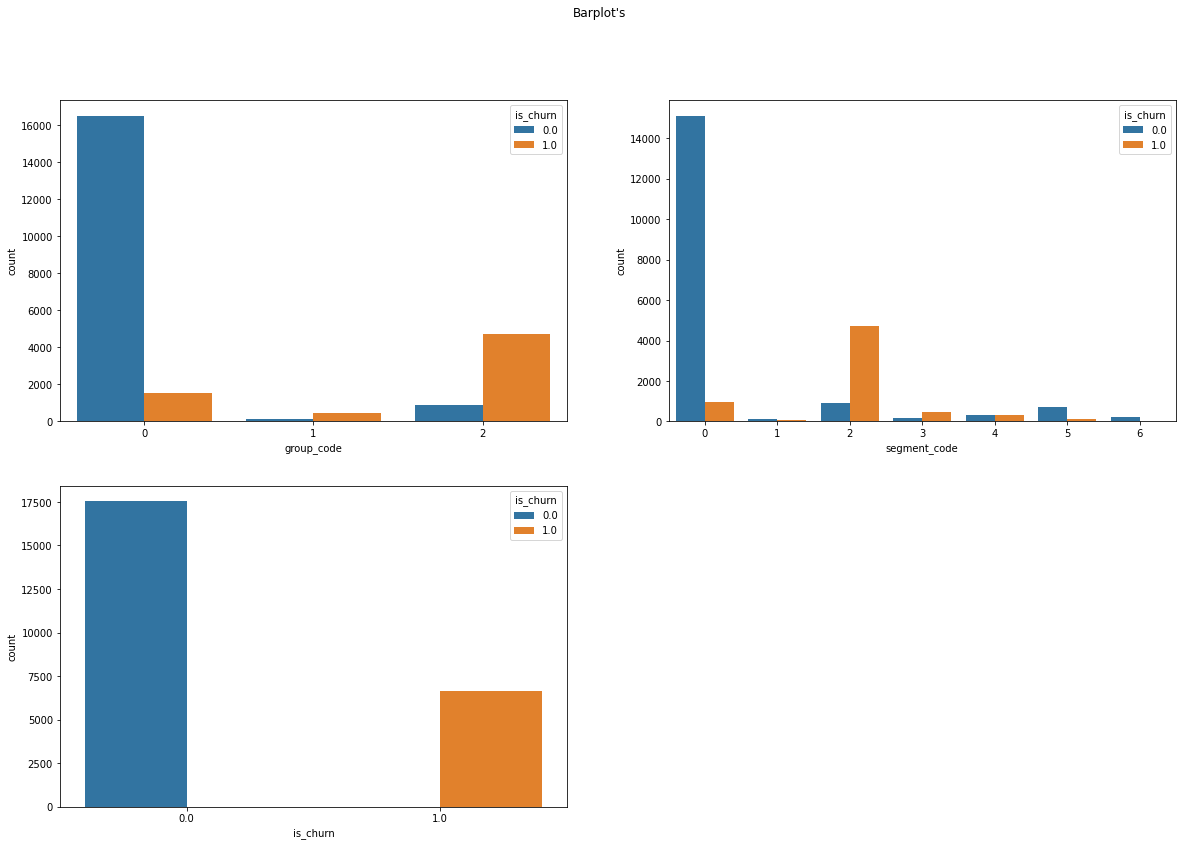

In [14]:
plot_bars(
    df_2, 
    features=[
        'group_code', 
        'segment_code', 
        'is_churn'
    ],
    target='is_churn',
    n_rows=2, 
    n_cols=2, 
    title="Barplot's", 
    figsize=(20, 13)
)

plt.savefig(os.path.join(IMG_PATH,'barplots.png'), format='png')

In [15]:
#Dataset encontra-se desbalanceado
#Maior concentração de churn no group_code 2 e segment_code 2.

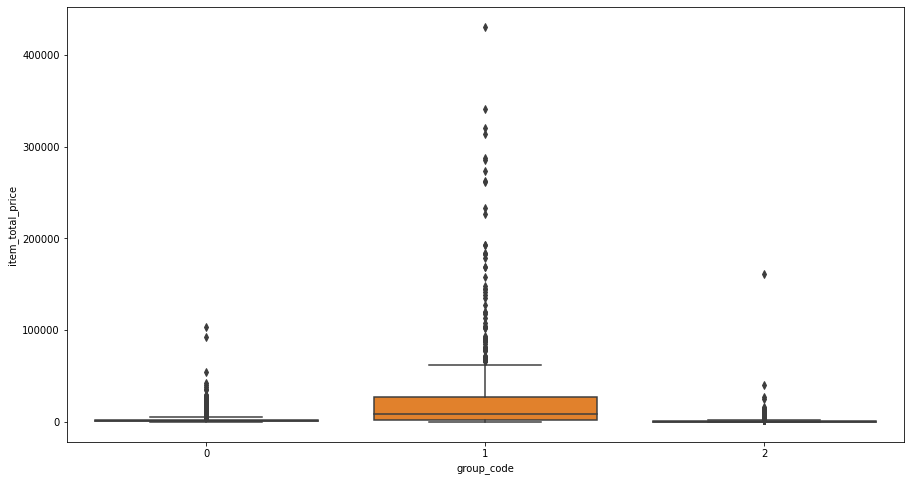

In [16]:
plt.figure(figsize = (15, 8))

sns.boxplot(y='item_total_price', x='group_code', data=df_2)

plt.savefig(os.path.join(IMG_PATH,'boxplot_i_total_price.png'), format='png')

In [18]:
df_2.to_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_NAME_2), index=False)

## Considerações

1. Com os dados é possivel realizar os seguintes estudos:

* Previsao de vendas por **item_code**;
* Previsao se o cliente irá dar *churn*;
* Previsao de vendas por **customer_code**;
* Categorizacao dos clientes com base em **total_price**;
* Calculo de elasticidade **Preço vs Produto**;
* Analise de Sobrevivencia do cliente.

2. Valor total da soma de todas as order é diferente do **total_price** o que pode significar algum tipo de desconto;
3. Em 14 vezes clientes pagaram valor a mais que o **item_total_price**;
4. Mesma **order_id** possui **sales_channel** e **seller_code** diferentes.